# Natural Language Processing - V.2

<img src="data/images/turing.png" alt="drawing" width="480" height="320"/>

**Natural Language Processing (NLP)** is a branch of artificial intelligence that allows computers to understand, interpret and manipulate human language. NLP draws from many disciplines, including computer science and computational linguistics, in its pursuit to fill the gap between human communication and computer understanding.

## Where do we find NLP?
* **Information retrieval:** For example, web searching algorithms that use keyword matching. 
* **Target Ads:** For example, algorithms that understand keywords from what you're looking for in social media and, give recommendations based on that.
* **Translators:** For example, Google Translate.
* **Speech Recognition:** For example, Siri, Alexa, Hey Google, or live captions.
* **Text Summarization:** Algorithms that allow getting a summary out of a text.
* **Sentiment Analysis:** reviews, tweets, comments where we try to understand the user's feelings. 


## NLP Pipeline

In all data science processes we have a defined pipeline. In the case of Natural Language Processing, the preprocessing steps differ from how we would approach work with structured data.

<img src="data/images/nlp_pipeline.png" alt="drawing" width="680" height="620"/>

We can consider the following steps:

**0.** Start with a Question.

**1.** Get the raw text and put it in a standard format.

**2.** Clean the data (remove punctuation, numbers, standardize text: lowercase text).

**3.** Tokenize: Divide text by sentences, or words.

**4.** Remove Stop words if needed.

**5.** Put text in a Matrix to handle the data better.

**6.** Perform EDA.

**7.** Apply Data Science techniques such as sentiment analysis, modelling, etc. 

**8.** Get conclusions. 

## Classification in NLP - Twitter Dataset 

Twitter is a well-known microblog service from which public data can be collected via APIs. NLTK's twitter corpus currently contains a sample of 20k Tweets retrieved from the Twitter Streaming API.

In [1]:
import re
import string
import itertools
import numpy as np
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import collections
from collections import Counter

# Download nltk data
nltk.download('twitter_samples')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
from nltk.corpus import twitter_samples 
from nltk.corpus import wordnet
from nltk.tag import pos_tag_sents

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


**Where are the files that we're downloading?**

By running `nltk.download('twitter_samples')`, we are downloading the twitter samples in json files.  
We can get their specific location and we'll find these files in our computers anytime.**

In [2]:
twitter_samples

<TwitterCorpusReader in 'C:\\Users\\USUARIO\\AppData\\Roaming\\nltk_data\\corpora\\twitter_samples'>

**How many JSON files do exist in the corpus twitter_samples?**

Use the `twitter_samples.fileids()` method:

In [3]:
twitter_samples.fileids()

['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']

**From `twitter_samples` we're getting Positive and Negative tuits.**

In [4]:
#Checking the first element:
print('Positive : ',twitter_samples.strings('positive_tweets.json')[0],'\n')
print('Negative : ',twitter_samples.strings('negative_tweets.json')[0])

Positive :  #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :) 

Negative :  hopeless for tmr :(


**We can also apply the Tokenized() method to divide the text by words and other characteres if needed.**

In [5]:
print('Positive : ',twitter_samples.tokenized('positive_tweets.json')[0],'\n')
print('Negative : ',twitter_samples.tokenized('negative_tweets.json')[0])

Positive :  ['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)'] 

Negative :  ['hopeless', 'for', 'tmr', ':(']


**We can divide the file by each tuit applying the string method with the objective of converting it into a Dataframe.**

In [6]:
positive_tw = twitter_samples.strings('positive_tweets.json')
negative_tw = twitter_samples.strings('negative_tweets.json')

**How many tuits do we have?**

In [7]:
print('Positive tweets: ',len(positive_tw))
print('Negative tweets: ',len(negative_tw))

Positive tweets:  5000
Negative tweets:  5000


### Adding  the tweets to new DataFrames using Pandas
**Creating one dataframe for positive tweets and one for negative tweets.**

In [8]:
positive_tweets = pd.DataFrame(positive_tw, columns= ['tweets'])
positive_tweets

,tweets
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...
1,@Lamb2ja Hey James! How odd :/ Please call our...
2,@DespiteOfficial we had a listen last night :)...
3,@97sides CONGRATS :)
4,yeaaaah yippppy!!! my accnt verified rqst has...
...,...
4995,"@chriswiggin3 Chris, that's great to hear :) D..."
4996,@RachelLiskeard Thanks for the shout-out :) It...
4997,@side556 Hey! :) Long time no talk...
4998,@staybubbly69 as Matt would say. WELCOME TO AD...


In [9]:
negative_tweets = pd.DataFrame(negative_tw, columns= ['tweets'])
negative_tweets

,tweets
0,hopeless for tmr :(
1,Everything in the kids section of IKEA is so c...
2,@Hegelbon That heart sliding into the waste ba...
3,"“@ketchBurning: I hate Japanese call him ""bani..."
4,"Dang starting next week I have ""work"" :("
...,...
4995,I wanna change my avi but uSanele :(
4996,MY PUPPY BROKE HER FOOT :(
4997,where's all the jaebum baby pictures :((
4998,But but Mr Ahmad Maslan cooks too :( https://t...


### Preprocessing Tasks

We have several preprocessing tasks when analyzing text:

- Tokenize
- Remove Stop Words
- Clean special characters in text
- Stemming/Lemmatization

We will start by merging the positive and negative tweets into one dataset and give them the tag `pos` or `neg`.

As a first step, we can create a new column which will identify the positive and the negative tweets. We will call this new columns `sentiment`. We'll do this to both Dataframes. 

In [10]:
positive_tweets['sentiment'] = 1
positive_tweets['sentiment_description'] = 'positive'

negative_tweets['sentiment'] = 0
negative_tweets['sentiment_description'] = 'negative'

#How does the positive tweets look like?
positive_tweets.head()

,tweets,sentiment,sentiment_description
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,1,positive
1,@Lamb2ja Hey James! How odd :/ Please call our...,1,positive
2,@DespiteOfficial we had a listen last night :)...,1,positive
3,@97sides CONGRATS :),1,positive
4,yeaaaah yippppy!!! my accnt verified rqst has...,1,positive


In [11]:
#How does the negative tweets look like?
negative_tweets.head()

,tweets,sentiment,sentiment_description
0,hopeless for tmr :(,0,negative
1,Everything in the kids section of IKEA is so c...,0,negative
2,@Hegelbon That heart sliding into the waste ba...,0,negative
3,"“@ketchBurning: I hate Japanese call him ""bani...",0,negative
4,"Dang starting next week I have ""work"" :(",0,negative


We can create a copy from the positive tweets to a new DataFrame that we will call `tweets`, that way we will add the negative tweets to the end of our new DataFrame, and we will have all the 10 thousand tweets mixed together, positive and negative.

In [12]:
# Creating the copy of the Positive tweets and adding it to a new DataFrame
tweets_df = positive_tweets.copy()
tweets_df

,tweets,sentiment,sentiment_description
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,1,positive
1,@Lamb2ja Hey James! How odd :/ Please call our...,1,positive
2,@DespiteOfficial we had a listen last night :)...,1,positive
3,@97sides CONGRATS :),1,positive
4,yeaaaah yippppy!!! my accnt verified rqst has...,1,positive
...,...,...,...
4995,"@chriswiggin3 Chris, that's great to hear :) D...",1,positive
4996,@RachelLiskeard Thanks for the shout-out :) It...,1,positive
4997,@side556 Hey! :) Long time no talk...,1,positive
4998,@staybubbly69 as Matt would say. WELCOME TO AD...,1,positive


In [13]:
# Adding the negative tweets to our new DataFrame "tweets".
tweets_df = tweets_df.append(negative_tweets, ignore_index = True)
tweets_df

,tweets,sentiment,sentiment_description
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,1,positive
1,@Lamb2ja Hey James! How odd :/ Please call our...,1,positive
2,@DespiteOfficial we had a listen last night :)...,1,positive
3,@97sides CONGRATS :),1,positive
4,yeaaaah yippppy!!! my accnt verified rqst has...,1,positive
...,...,...,...
9995,I wanna change my avi but uSanele :(,0,negative
9996,MY PUPPY BROKE HER FOOT :(,0,negative
9997,where's all the jaebum baby pictures :((,0,negative
9998,But but Mr Ahmad Maslan cooks too :( https://t...,0,negative


In [14]:
tweets_df = tweets_df.sample(frac = 1)
tweets_df

,tweets,sentiment,sentiment_description
7115,Delph injured already :( #MCFC,0,negative
5542,@JackJcnes text: :( why,0,negative
7907,Vidcon :(((((((((,0,negative
518,I still fully intend to write as many game des...,1,positive
514,#ProKabaddi Koel Mallick @YourKoel recites the...,1,positive
...,...,...,...
9176,@bbgurrll i miss you too :(,0,negative
2649,dear haters :) https://t.co/BxqZP6MXgr,1,positive
8305,@Y0rgi Wish I could give some to you. I really...,0,negative
5183,its not the same. :(((((,0,negative


In [15]:
tweets_df.reset_index(drop = True, inplace= True)
tweets_df

,tweets,sentiment,sentiment_description
0,Delph injured already :( #MCFC,0,negative
1,@JackJcnes text: :( why,0,negative
2,Vidcon :(((((((((,0,negative
3,I still fully intend to write as many game des...,1,positive
4,#ProKabaddi Koel Mallick @YourKoel recites the...,1,positive
...,...,...,...
9995,@bbgurrll i miss you too :(,0,negative
9996,dear haters :) https://t.co/BxqZP6MXgr,1,positive
9997,@Y0rgi Wish I could give some to you. I really...,0,negative
9998,its not the same. :(((((,0,negative


Notes:

**1.** Why do we use `df.sample()`? 
  The method from Pandas, `df.sample()`, is used to generate a sample random row or column from the function caller data frame.


**2.** If any of your columns don't have the same name, your DataFrame will look not organized, you can givi it a try and check what exactly happens.

**3.** Did you notice how important is checking every step? Paying attention to the index of our DataFrame was very important.

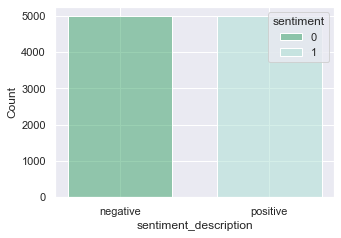

In [16]:
#Let's visualize and verify that our data is consistent.

plt.figure(figsize=(5,3.5)) #this fixes the size ratio
sns.set() #this gives it more style
sns.histplot(data=tweets_df, x='sentiment_description', palette="BuGn_r", hue = 'sentiment', shrink=.7)

Cleaning and standardizing the text data:
1. Lowercase
2. Remove extra white spaces.
3. Remove URL's

### Lowercase:

We use `str.lower()` to convert all characters from our tweets to lowercase. 
Let's remember, **[string](https://docs.python.org/3/library/stdtypes.html#string-methods)** has many different **methods** to handle text which belongs to the different **[Text Processing Services](https://docs.python.org/3/library/text.html#textservices)** of Python.

<img src="data/images/string_methods.png" alt="drawing" width="750" height="550"/>

In [17]:
#Lowercase
def convert_lowercase(tweets):
    return tweets.lower()

tweets_df['tweets'] = tweets_df['tweets'].apply(lambda k: convert_lowercase(k))

tweets_df.head(10)

,tweets,sentiment,sentiment_description
0,delph injured already :( #mcfc,0,negative
1,@jackjcnes text: :( why,0,negative
2,vidcon :(((((((((,0,negative
3,i still fully intend to write as many game des...,1,positive
4,#prokabaddi koel mallick @yourkoel recites the...,1,positive
5,"onkey!!! :-* :-* &gt;,,&lt;!! nice edit(?) lo...",1,positive
6,@theguyliner @trishie_d cool. :d,1,positive
7,@mr_sinister0013 thanks for playing #journeyps...,1,positive
8,i hate being an adult sometimes :(,0,negative
9,sometimes the most ordinary things can be made...,1,positive


**Now, we need to clean the text data that belongs to each tweet. What kind of characteres do you think we need to remove?**

### Finding and Removing URL's:

First of all, we need to find out if there are any tweets that contain URL's. After that, we can proceed to remove the URL's from the tweets.

In [18]:
#Finding the tweets that contain 'https
def find_url(tweets):
    return tweets.find('http')

tweets_df['find_url'] = tweets_df['tweets'].apply(lambda k: find_url(k))
tweets_df

,tweets,sentiment,sentiment_description,find_url
0,delph injured already :( #mcfc,0,negative,-1
1,@jackjcnes text: :( why,0,negative,-1
2,vidcon :(((((((((,0,negative,-1
3,i still fully intend to write as many game des...,1,positive,-1
4,#prokabaddi koel mallick @yourkoel recites the...,1,positive,99
...,...,...,...,...
9995,@bbgurrll i miss you too :(,0,negative,-1
9996,dear haters :) https://t.co/bxqzp6mxgr,1,positive,15
9997,@y0rgi wish i could give some to you. i really...,0,negative,-1
9998,its not the same. :(((((,0,negative,-1


In [19]:
tweets_df['find_url'].value_counts()

-1      8335
 74       38
 73       37
 38       34
 117      33
        ... 
 122       2
 124       1
 4         1
 130       1
 119       1
Name: find_url, Length: 120, dtype: int64

What did we do? We created a column called `find_url` to have a sort of tag for the tweets that contain URL's. These tweets will have numbers equal or bigger than 0 and less or equal to 140.

In [20]:
with_url = range(140)
match_url = tweets_df[tweets_df['find_url'].isin(with_url)] 
match_url.head(10)

,tweets,sentiment,sentiment_description,find_url
4,#prokabaddi koel mallick @yourkoel recites the...,1,positive,99
5,"onkey!!! :-* :-* &gt;,,&lt;!! nice edit(?) lo...",1,positive,111
24,well summers over then :( knew it wouldn't las...,0,negative,75
27,you're gonna be such a good father :( https://...,0,negative,38
28,remember that unlisted one where he had a hick...,1,positive,54
42,only one leg on september. so perhaps bb will ...,1,positive,85
50,sense of awe :) http://t.co/jtjojcdhwg via @di...,1,positive,16
52,i'm back :) sorry i had many problems :) http:...,1,positive,41
58,#climatechange #cc it ain't easy being green i...,0,negative,93
60,twine is looking great over at diane's place :...,1,positive,48


**We have to remove URL's out of 1665 tweets**

To remove the URL's we will use Regular Expresions! 

In [21]:
def remove_urls(tweets):
    url_pattern = re.compile(r'http[s]?://\S+|www\.\S+')
    return url_pattern.sub(r'', tweets)

tweets_df['tweets'] = tweets_df['tweets'].apply(remove_urls)
tweets_df.head(10)

,tweets,sentiment,sentiment_description,find_url
0,delph injured already :( #mcfc,0,negative,-1
1,@jackjcnes text: :( why,0,negative,-1
2,vidcon :(((((((((,0,negative,-1
3,i still fully intend to write as many game des...,1,positive,-1
4,#prokabaddi koel mallick @yourkoel recites the...,1,positive,99
5,"onkey!!! :-* :-* &gt;,,&lt;!! nice edit(?) lo...",1,positive,111
6,@theguyliner @trishie_d cool. :d,1,positive,-1
7,@mr_sinister0013 thanks for playing #journeyps...,1,positive,-1
8,i hate being an adult sometimes :(,0,negative,-1
9,sometimes the most ordinary things can be made...,1,positive,-1


**Confirm that tweets don't contain URL's anymore**

In [22]:
def find_url(tweets):
    return tweets.find('http')

tweets_df['find_url'] = tweets_df['tweets'].apply(lambda k: find_url(k))
tweets_df

,tweets,sentiment,sentiment_description,find_url
0,delph injured already :( #mcfc,0,negative,-1
1,@jackjcnes text: :( why,0,negative,-1
2,vidcon :(((((((((,0,negative,-1
3,i still fully intend to write as many game des...,1,positive,-1
4,#prokabaddi koel mallick @yourkoel recites the...,1,positive,-1
...,...,...,...,...
9995,@bbgurrll i miss you too :(,0,negative,-1
9996,dear haters :),1,positive,-1
9997,@y0rgi wish i could give some to you. i really...,0,negative,-1
9998,its not the same. :(((((,0,negative,-1


In [23]:
with_url = range(140)
match_url_2 = tweets_df[tweets_df['find_url'].isin(with_url)] 
print("Tweets that still contain URL's?")
match_url_2

Tweets that still contain URL's?


,tweets,sentiment,sentiment_description,find_url
1196,@httpbethx i packed all my socks for camping s...,0,negative,1
3819,@httpsguitarist fback? :),1,positive,1


### Replacing emojis and emoticons with words

In [26]:
import re
from emot.emo_unicode import UNICODE_EMOJI, EMOTICONS_EMO

In [29]:
# To convert emojis into words:
def convert_emojis(text):
    for emot in UNICODE_EMOJI:
        text = text.replace(emot, "_".join(UNICODE_EMOJI[emot].replace(",","").replace(":","").split()))
    return text 

#This is an example:
ds4a_text = "DS4A bring to us so many emotions, mainly, happiness 😂😎"
convert_emojis(ds4a_text)

'DS4A bring to us so many emotions, mainly, happiness face_with_tears_of_joysmiling_face_with_sunglasses'

In [33]:
# To convert emoticons into words:
def convert_emoticons(text):
    for emot in EMOTICONS_EMO:
        text = re.sub(u'('+emot+')', "_".join(EMOTICONS_EMO[emot].replace(",","").split()), text)
    return text

#This is an example:
#ds4a_text_2 = "Data Science has changed my life :D :D :3"
#convert_emoticons(ds4a_text_2)

In [ ]:
tweets_df['tweets_no_emoticons'] = tweets_df['tweets'].apply(convert_emoticons)
tweets_df.head(10)

In [ ]:
tweets_df['tweets_no_emojis'] = tweets_df['tweets_no_emoticons'].apply(convert_emojis)
tweets_df.head(5)

In [ ]:
tweets_df['tweets_no_emojis'] = tweets_df['tweets_no_emojis'].str.replace('_',' ')
tweets_df.head(5)

In [ ]:
def remove_mentions(tweets):
    mention_pattern = re.compile(r'(@[A-Za-z0-9]+)|[_]|([^0-9A-Za-z \t])|(\w+:\/\/\S+)')
    return mention_pattern.sub(r'', tweets)

tweets_df['tweets_no_mentions'] = tweets_df['tweets_no_emojis'].apply(remove_mentions)
tweets_df.head(5)

In [ ]:
tweets_df['new_tweets'] = tweets_df['tweets_no_mentions']

In [ ]:
#Let's have a new DataFrame 
new_tweets_df = tweets_df[['new_tweets', 'sentiment', 'sentiment_description']]
new_tweets_df

### Removing other characteres (punctuation, extra spaces, numbers and special characters)

In [ ]:
def remove_noise(tweet):
    tweet = re.sub("(@[A-Za-z0–9_]+)","", tweet)
    tweet ="".join([char if char not in string.punctuation else " " for char in tweet])
    tweet = re.sub(' +', ' ', tweet) 
    tweet = re.sub("[0–9]+","", tweet)
    tweet = re.sub("[^A-Za-z0–9_. ]+","",tweet)
 
    return tweet

#Creating a new column called 'tweets' that is going to contain our result.
new_tweets_df['tweets'] = new_tweets_df['new_tweets'].apply(lambda x: remove_noise(x))

# Selecting only the columns that are relevant
new_tweets_df = new_tweets_df[['tweets', 'sentiment', 'sentiment_description']]
new_tweets_df

### Selecting stop words

Given that we are aiming to make a Sentiment Analysis, we don't want to remove the negative stopwords because it could impact our detection of any negative sentiment.

In [ ]:
# We use NLTK - Loading stop words and removing negative stop words from the list

stop_words = stopwords.words('english')
keep_these_words = ['don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'no', 'nor', 'not', 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
our_stop_words = stop_words
for word in keep_these_words:
    our_stop_words.remove(word)

our_stop_words

## Stop words

In [ ]:
from nltk.tokenize import word_tokenize

def remove_stop_words(tweet):
    tokens = word_tokenize(tweet)
    tweet_with_no_stop_words = [token for token in tokens if not token in our_stop_words]
    reformed_tweet = ' '.join(tweet_with_no_stop_words)
 
    return reformed_tweet


new_tweets_df['tweets'] = new_tweets_df['tweets'].apply(lambda x: remove_stop_words(x))
new_tweets_df

## Tokenize

In [ ]:
from nltk.tokenize.regexp import regexp_tokenize

In [ ]:
%%time
new_tweets_df['tweets_token'] = new_tweets_df['tweets'].apply(lambda x:regexp_tokenize(x,pattern='\s+',gaps=True))
new_tweets_df

In [ ]:
new_tweets_df['tweets_length'] = new_tweets_df['tweets_token'].apply(lambda x:len(x))
new_tweets_df

### Tweets length distribution

In [ ]:
sns.displot(new_tweets_df, x="tweets_length", kind="kde")

## Positive and negative tweets

In [ ]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')
 
all_positive_tweets[0:10]

### Using Collections library

The Collections module implements high-performance container datatypes (beyond the built-in types list, dict and tuple) and contains many useful data structures that you can use to store information in memory.

**Counter()**
* A Counter is a container that tracks how many times equivalent values are added.
* It can be used to implement the same algorithms for which other languages commonly use bag or multiset data structures

In [ ]:
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()
 

for i in range(len(all_positive_tweets)):
    for word in all_positive_tweets[i].lower().split(" "):
        positive_counts[word]+=1
        total_counts[word]+=1
 
 
for i in range(len(all_negative_tweets)):
    for word in all_negative_tweets[i].lower().split(" "):
        negative_counts[word]+=1
        total_counts[word]+=1

positive_counts.most_common()[0:25]


In [ ]:
type(positive_counts)

In [ ]:
positive_df = pd.DataFrame(positive_counts.most_common(15), columns=['words', 'count'])
positive_df.head(7)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
positive_df.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color='orange')
ax.set_title("Frequency of Positive Words - Common Words Found in Tweets")
plt.show()

In [ ]:
negative_counts.most_common()[0:25]

In [ ]:
negative_df = pd.DataFrame(negative_counts.most_common(15), columns=['words', 'count'])
negative_df.head(7)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
negative_df.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color='green')
ax.set_title("Frequency of Negative Words - Common Words Found in Tweets")
plt.show()

### Top 20 words with the highest Positive Sentiment Score

In [ ]:
pos_neg_ratios = Counter()
 
# Calculate the ratios of positive and negative uses of the most common words
# Consider words to be "common" if they've been used at least 100 times
for term,cnt in list(total_counts.most_common()):
    if(cnt > 100):
        pos_neg_ratio = positive_counts[term] / float(negative_counts[term]+1)
        pos_neg_ratios[term] = pos_neg_ratio

pos_neg_ratios.most_common()[0:20]

### Top 20 words with the highest Positive Sentiment Score

In [ ]:
pos_neg_ratios.most_common()[::-1][0:20]

###  Understanding the context for each word in our tweets

In [ ]:
from nltk.tag import pos_tag
from nltk.corpus import twitter_samples

tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
print(pos_tag(tweet_tokens[0]))

From the list of tags, here is the list of the most common items and their meaning:

**NNP:** Noun, proper, singular

**NN:** Noun, common, singular or mass

**IN:** Preposition or conjunction, subordinating

**VBG:** Verb, gerund or present participle

**VBN:** Verb, past participle

### Stemming

Stemming is the process of removing prefixes and suffixes from words so that they are reduced to simpler forms which are called stems.

In [ ]:
from nltk import PorterStemmer

sentence = ["We","all","have","fun", "when", "we", "understand", "every", "topic", "given", "in", "DS4A"]
sentence2 = ["Totally", "locuras"]
porterStemmer = PorterStemmer()

print (" ".join([porterStemmer.stem(word) for word in sentence]))
print (" ".join([porterStemmer.stem(word) for word in sentence2]))

# Prints "thi sentenc wa transform use porter stemmer"

### Lemmatization

In lemmatization, the speech part of a word must be determined first and the normalization rules will be different for different parts of the speech, whereas, the stemmer operates on a single word without knowledge of the context, and therefore cannot discriminate between words that have different meanings depending on part of the speech.

### Generating tags for each token in the text to Normalize sentences and to lemmatize each word using the tag

- The function lemmatize_sentence gets the position tag of each token of a tweet.
- For example, if the tag starts with NN, the token is assigned as a noun. 

In [ ]:
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer

def lemmatize_sentence(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in pos_tag(tokens):
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    return lemmatized_sentence

print(lemmatize_sentence(tweet_tokens[1]))

## Why NLP is important?

* Human language is astoundingly perplexing and diverse. NLP is an approach that helps us improve our communication and influence skills at a time these are becoming even more important. 


* In order to make sense of natural language, computers need to listen, process, and analyze human text and speech. 


* Even though computing systems enable fast and highly accurate communication channels, machines have never been good at understanding how and why we communicate in the first place.


*  NLP is significant in light of the fact that it helps settle ambiguity in language and adds valuable numeric structure to the information for some downstream applications, for example, speech recognition or text analytics.

<img src="data/images/turing__end.png" alt="drawing" width="480" height="320"/>